In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns


df = pd.read_csv('diabetes.csv')
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [2]:
#Checking for any null values in the dataset.

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [3]:
remove_feature = ['Pregnancies']
new_df = df.drop(remove_feature, inplace=False, axis=1)
new_df.columns.tolist()

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [4]:
#Drop any missing values and remove duplicates.

new_df.columns.dropna()
print(new_df.shape)
print("1 value was dropped")

new_df_duplicates = new_df.drop_duplicates()
print(new_df_duplicates.shape)
print("No duplicates were found")

(768, 8)
1 value was dropped
(768, 8)
No duplicates were found


In [7]:
#Datatypes for the values.

new_df_duplicates.dtypes

Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

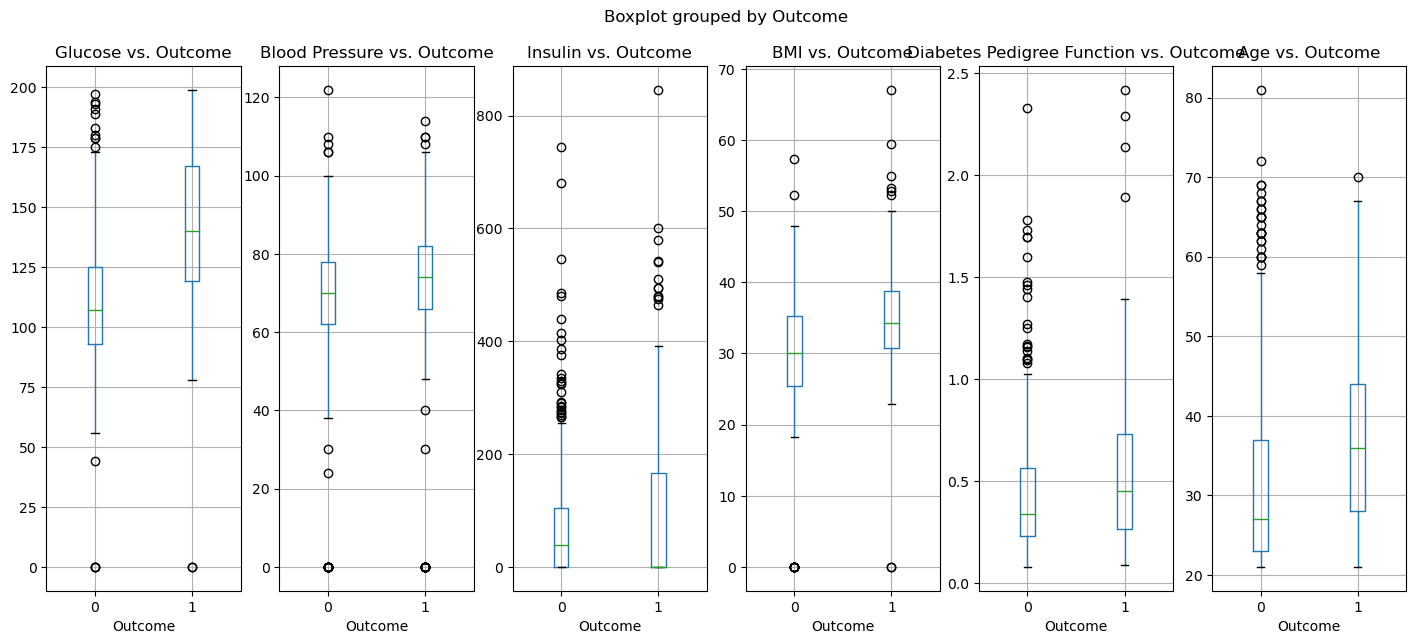

There is one outlier in the Insulin vs Outcome boxplot.


In [6]:
#Finding any outliers in the dataset.

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(17, 7))

df.boxplot(column='Glucose', by='Outcome', ax=axes[0])
df.boxplot(column='BloodPressure', by='Outcome', ax=axes[1])
df.boxplot(column='Insulin', by='Outcome', ax=axes[2])
df.boxplot(column='BMI', by='Outcome', ax=axes[3])
df.boxplot(column='DiabetesPedigreeFunction', by='Outcome', ax=axes[4])
df.boxplot(column='Age', by='Outcome', ax=axes[5])

axes[0].set_title('Glucose vs. Outcome')
axes[1].set_title('Blood Pressure vs. Outcome')
axes[2].set_title('Insulin vs. Outcome')
axes[3].set_title('BMI vs. Outcome')
axes[4].set_title('Diabetes Pedigree Function vs. Outcome')
axes[5].set_title('Age vs. Outcome')

for ax in axes:
    ax.set_xlabel('Outcome')
    ax.set_xticklabels(['0', '1'])

plt.show()

print("There is one outlier in the Insulin vs Outcome boxplot.")


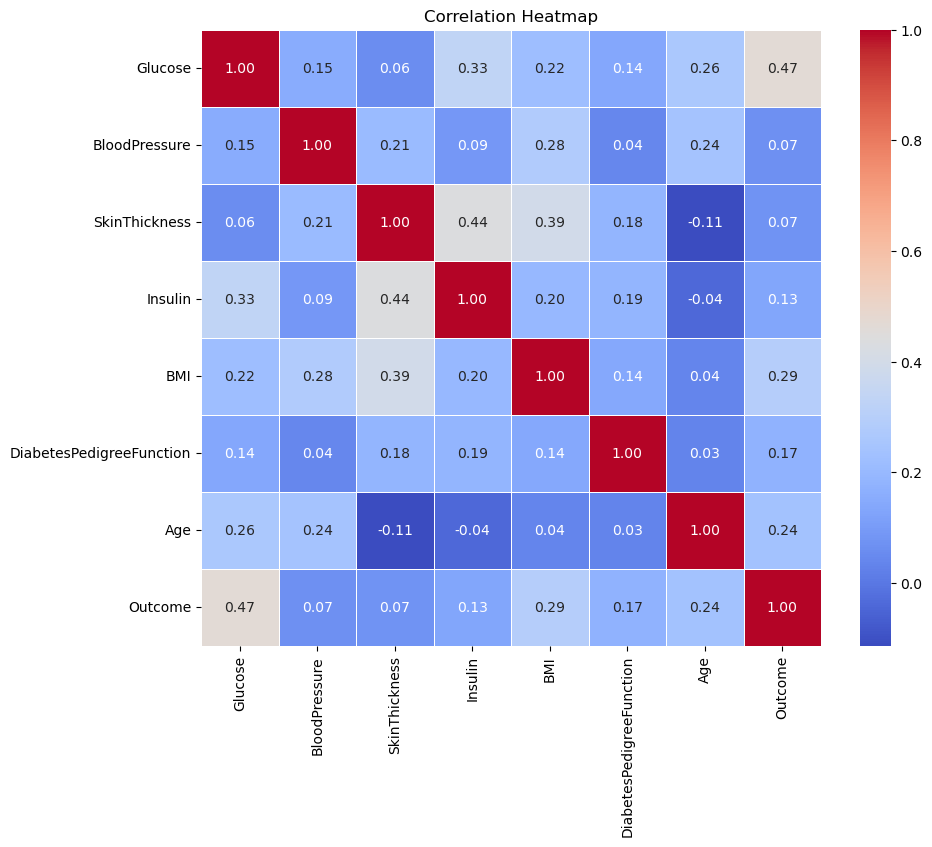

In [7]:

import matplotlib.pyplot as plt

columns_to_exclude = ['Pregnancies']
df_corr = df.drop(columns=columns_to_exclude).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()



In [8]:
#Anova Scores
from sklearn.feature_selection import SelectKBest, f_classif

feature_columns = ['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
target_column = 'Outcome'

X = df[feature_columns]
y = df[target_column]

fs = SelectKBest(score_func=f_classif, k='all')
bestFeatures = fs.fit(X, y)

print("ANOVA Scores:")
print(bestFeatures.scores_)

print("\nANOVA P-Values:")
print(bestFeatures.pvalues_)

ANOVA Scores:
[213.16175218   3.2569504   13.28110753  71.7720721   23.8713002
  46.14061124]

ANOVA P-Values:
[8.93543165e-43 7.15139001e-02 2.86186460e-04 1.22980749e-16
 1.25460701e-06 2.20997546e-11]


In [9]:
#Dropping features based on anova scores. 
drop_features = ['BloodPressure']
features = new_df.drop(drop_features, axis=1)
features.columns.tolist()

['Glucose',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [14]:
#Balancing the data
columns_to_exclude = ['BloodPressure']
columns_to_include = [column for column in features.columns if column not in columns_to_exclude]


for column in columns_to_include:
    print(f'Column: {column}')
    print(features[column].value_counts())
    print('\n')

target_counts = features['Outcome'].value_counts()
print(target_counts)

is_balanced = target_counts.min() / target_counts.max() >= 0.5
if is_balanced:
    print("The target variable is balanced.")
else:
    print("The target variable is imbalanced.")


Column: Glucose
99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: Glucose, Length: 136, dtype: int64


Column: SkinThickness
0     227
32     31
30     27
27     23
23     22
33     20
28     20
18     20
31     19
19     18
39     18
29     17
40     16
25     16
26     16
22     16
37     16
41     15
35     15
36     14
15     14
17     14
20     13
24     12
42     11
13     11
21     10
46      8
34      8
12      7
38      7
11      6
43      6
16      6
45      6
14      6
44      5
10      5
48      4
47      4
49      3
50      3
8       2
7       2
52      2
54      2
63      1
60      1
56      1
51      1
99      1
Name: SkinThickness, dtype: int64


Column: Insulin
0      374
105     11
130      9
140      9
120      8
      ... 
73       1
171      1
255      1
52       1
112      1
Name: Insulin, Length: 186, dtype: int64


Column: BMI
32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
        ..
36.7 

In [16]:
from sklearn.model_selection import train_test_split

X = features.drop('Outcome', axis=1)
y = features['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (614, 6)
X_test shape: (154, 6)
y_train shape: (614,)
y_test shape: (154,)


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
y_pred = logreg_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

confusion = confusion_matrix(y_test, y_pred)
print("Matrix:\n", confusion)

Accuracy: 0.8506493506493507
Matrix:
 [[92  8]
 [15 39]]
